<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson3---Data-blocks;-Multi-label-classification;-Segmentation" data-toc-modified-id="Lesson3---Data-blocks;-Multi-label-classification;-Segmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson3 - Data blocks; Multi-label classification; Segmentation</a></span><ul class="toc-item"><li><span><a href="#Image-segmentation-with-CamVid" data-toc-modified-id="Image-segmentation-with-CamVid-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Image segmentation with CamVid</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Go-big" data-toc-modified-id="Go-big-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Go big</a></span></li><li><span><a href="#fin" data-toc-modified-id="fin-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>fin</a></span></li></ul></li></ul></div>

---
本notebook在fastai v3 课程3的notebook基础上，运行出结果后，对相应**知识点进行补充或总结**，同时整理了相应的**xmind文档。**  

<img src="assests/lesson3/lesson3xmind.jpg" width="500">

xmind下载地址[点击这里](https://github.com/greebear/fast.ai-notes/blob/master/xmind/lesson3.xmind) 

---
<font color='green'>
    
**希望达到的效果**
- 回忆录：学过对应内容，浏览一遍nb后，就能快速回忆起知识点
- 优化工具：实践过程中，能在对应的笔记中快速找到调优方法

**学习方法推荐**
- 一边观看fastai视频一边运行notebook
- 完成学习后，通过xmind笔记回忆所有知识点

<font color='blue'>
    
本notebook的内容与图片参考于：   
- fastai v3 lesson3 notebook [Lesson3-camvid-tiramisu](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid-tiramisu.ipynb) 

# Lesson3 - Data blocks; Multi-label classification; Segmentation
## Image segmentation with CamVid

**Jeremy将带领大家完成CamVid分割任务，并且得到SOTA(state-of-the-art)准确度 94.1%**  
**相比较于2016最好的分割算法 https://arxiv.org/abs/1611.09326 ，提升了3个百分点 !**  

<img src="assests/lesson3/sota_acc.jpg" width="800">

语义分割是什么？
- 概念：对图片中的每一个像素点进行分类
- 用途：医疗、自动驾驶

---
`%reload_ext autoreloa`    在执行用户代码前，重新装入 软件的扩展和模块  
`%autoreload 2`    自动重载%aimport排除的模块之外的所有模块  
`%matplotlib inline`    将matplotlib绘制图像在Jupyter Notebook中展示  

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

The One Hundred Layer Tiramisu paper used a modified version of Camvid, with smaller images and few classes. You can get it from the CamVid directory of this repo:

    git clone https://github.com/alexgkendall/SegNet-Tutorial.git

可于fastai官网获取更多的数据  
网址：https://course.fast.ai/datasets

In [3]:
# usage see camvid tiramisu
# path = Path('./data/camvid-small')
path = Path('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/')

In [4]:
path.ls()

[PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/test.txt'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/test'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/train'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/train.txt'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/testannot'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/trainannot'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/val.txt'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/valannot'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/val')]

## Data

In [5]:
fnames = get_image_files(path/'val')
fnames[:3]

[PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/val/0016E5_07973.png'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/val/0016E5_08019.png'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/val/0016E5_08139.png')]

In [6]:
lbl_names = get_image_files(path/'valannot')
lbl_names[:3]

[PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/valannot/0016E5_07973.png'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/valannot/0016E5_08019.png'),
 PosixPath('/kaggle/input/camvid-tiramisu/repository/alexgkendall-SegNet-Tutorial-bb68b64/CamVid/valannot/0016E5_08139.png')]

---
查看图片
- 一般图片 `open_image`
- mask图片 `open_mask`
    - `open_mask`函数会返回int类型数据而不是float

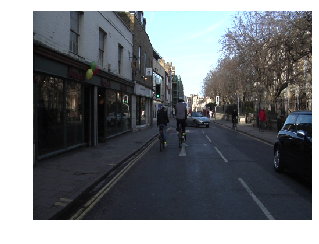

In [7]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [8]:
def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
    'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

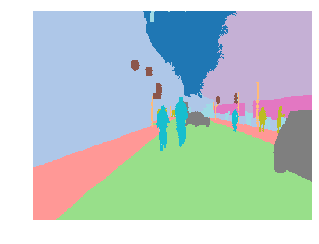

In [9]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

---
查看图片大小与图片(mask)内容

In [10]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([360, 480]), tensor([[[1, 1, 1,  ..., 5, 5, 5],
          [1, 1, 1,  ..., 5, 5, 5],
          [1, 1, 1,  ..., 5, 5, 5],
          ...,
          [4, 4, 4,  ..., 3, 3, 3],
          [4, 4, 4,  ..., 3, 3, 3],
          [4, 4, 4,  ..., 3, 3, 3]]]))

## Datasets

In [11]:
bs,size = 8,src_size//2

---
`split_by_folder(valid='val')`
- 数据需分为 训练集 和 验证集
- 不能随机取视频帧作为 验证集
    - 如果两个帧相邻：一个在train一个在valid 则相当于作弊
- 因此需要额外创建一个valid(`valid='val'`)，数据提供方已经完成此步骤，我们仅需载入相关数据

`get_y_fn`
- 获取新路径下对应的mask图片：包含原始图片中每个像素点对应的label

`code`
- 每个label所对应的类别

In [12]:
src = (SegmentationItemList.from_folder(path)
       .split_by_folder(valid='val')
       .label_from_func(get_y_fn, classes=codes))

---
`tfm_y=True`
- 因为在transform时，原始图片会翻转，所以对应的mask图片也要翻转

`bs`
- 调整batch size，语义分割会占用大量gpu资源，一般难以设置较大的bs

`normalize(imagenet_stats)`
- 根据imagenet数据统计(均值mean与方差std)归一化新数据
- 如果你应用了一个预习训练模型(pretrained model)，那么你需要用该模型相同的数据统计(stats)  
备注：这里将stats翻译成“数据统计”，有更好的翻译请联系我

In [13]:
data = (src.transform(get_transforms(), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

---
检验databunch
- 创建好的语义分割databunch进行show_batch，show_batch会根据label生成半透明各种颜色的mask，显示在原图片上

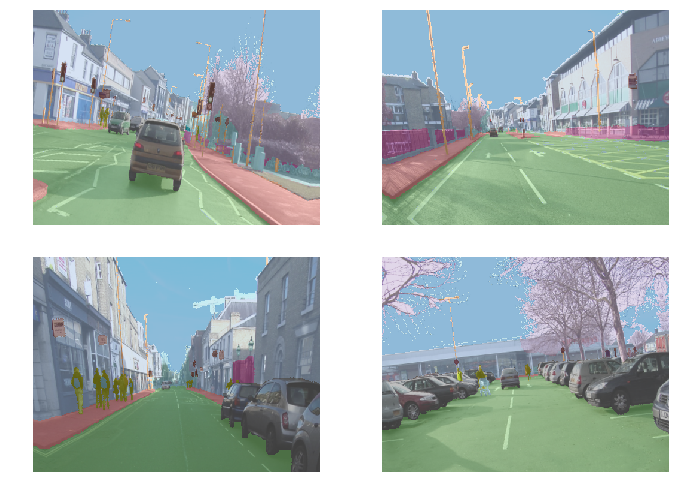

In [14]:
data.show_batch(2, figsize=(10,7))

## Model

---
**训练(微调)模型**
- 创建模型(U-net)
    - unet_learner
        - `learn = unet_learner(data, models.resnet34, metrics=metrics, wd=1e-2)`
        - 评估指标 `metric`：根据CamVid论文 剔除无效标签“void”的影响
        - 模型结构 `arch`：`arch = models.resnet34`
    - 相关资料：https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/
- 寻找最佳学习率
    - `lr_find(learn)` `learn.recorder.plot()`
    - 学习率&损失 曲线：<img src="assests/lesson3/lr_find02.jpg" width="500"/>
    - 找到图片中坡度最陡的位置，本例在2e-3附近，`lr=2e-3`
- 拟合模型
    - `learn.fit_one_cycle(10, slice(lr), pct_start=0.8`    
    参数补充说明：  
        - `max_lr`：我们填入的学习率，其实是一个周期(cycle)中，最大的学习率。此处`max_lr = slice(lr)`  
        如果slice中只有**一个参数**，那么所有可训练(trainable)的层数都将设置为相同的学习率  
        如果slice中有**两个参数**，那么将为不同可训练层设置不同的学习率  
            - 例子：`slice(1e-5, 1e-3)`
                - 模型前面层网络，设置较小学习率(1e-3)
                - 模型后面层网络，设置较大学习率(1e-5)
                - 模型中间层网络，设置的学习率分布于(1e-5, 1e-3)之间
        - `pct_start`：Percentage of total number of epochs when learning rate rises during one cycle.  
        一个周期内，学习率上升时占总epoch数的百分比。
            - 例子：假如一个周期(one cycle)，epoch数为50
                - 上升：那么`pct_start=0.2`则代表在前10个epoch训练过程中，学习率是上升的，并且最高上升到`max_lr`；
                - 下降：第10个epoch(达到最大学习率`max_lr`)之后，剩下的40个epochs开始学习率退火。
                - 学习率退火曲线：<img src="assests/lesson3/lr_annealing.jpg" width="500"/>

In [15]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [18]:
metrics=acc_camvid
wd=1e-2*1.2

In [20]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd, model_dir='/tmp/models', bottle=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 70.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


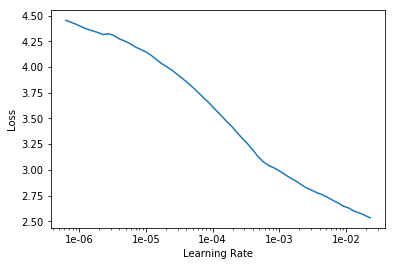

In [21]:
lr_find(learn)
learn.recorder.plot()

In [22]:
lr=2e-3

In [23]:
learn.fit_one_cycle(12, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.359050,0.900549,0.763154,00:28
1,0.890487,0.630507,0.818141,00:25
2,0.667346,0.508264,0.862931,00:25
3,0.545963,0.414032,0.884084,00:25
4,0.494945,0.447011,0.875442,00:25
5,0.494936,0.416864,0.872351,00:25
6,0.533480,0.488357,0.876236,00:25
7,0.472533,0.411163,0.866791,00:25
8,0.431105,0.416464,0.875090,00:25
9,0.403222,0.354374,0.890177,00:25


In [26]:
learn.save('stage-1')

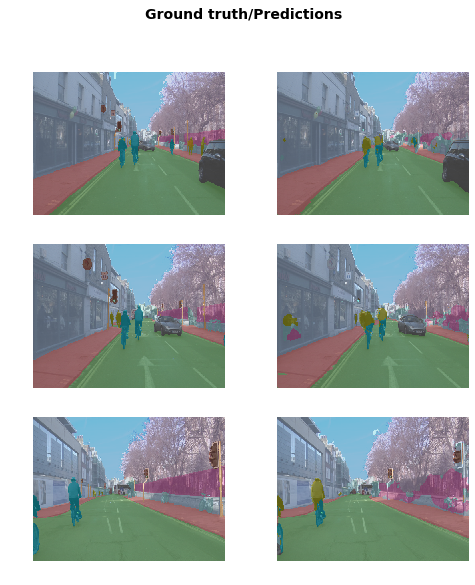

In [25]:
learn.show_results(rows=3, figsize=(8,9))

---
**开始微调整个模型**

**优化策略1 ：**
1. unfreeze模型
2. 利用学习率查找器(learning rate finder)，绘制学习率与损失的之间变化图像 ![image.png](assests/lesson3/lr_find.png)  
3. max_lr的设置
    - lrs = slice(lr/100,lr/2)
    - learn.fit_one_cycle(12, lrs, pct_start=0.8)
        - max_lr中的第二部分的学习率(eg. lr/2)，为模型训练上一阶段学习率的1/2。Jeremy提供的nb第二部分为lr(2e-3)，多次尝试后效果没有lr/2(1e-3)好。
        - max_lr中的第一部分的学习率(eg. lr/100)，为图像中loss较低的前部分，并且它在loss发散(本例中大概在1e-4到1e-3之间开始发散)之前。
4. 模型不同层设置不同学习率 
    - 模型前面层参数，设置较小学习率(lr/5)
    - 模型后面层参数，设置较大学习率(1e-5)
    - 模型中间层网络，设置的学习率分布于(1e-5, lr/5)之间

In [27]:
learn.load('stage-1');

In [28]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


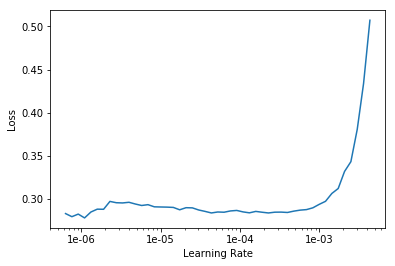

In [29]:
lr_find(learn)
learn.recorder.plot()

In [30]:
lrs = slice(lr/100,lr/2)

In [31]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.279826,0.281616,0.914706,00:26
1,0.270979,0.275536,0.916050,00:26
2,0.265806,0.288293,0.912060,00:26
3,0.257794,0.297071,0.911293,00:26
4,0.264197,0.260111,0.925813,00:26
5,0.277175,0.301984,0.904198,00:26
6,0.273575,0.271491,0.919632,00:26
7,0.276704,0.281435,0.915256,00:26
8,0.263708,0.307843,0.908506,00:26
9,0.248715,0.308021,0.907803,00:26


In [32]:
learn.save('stage-2');

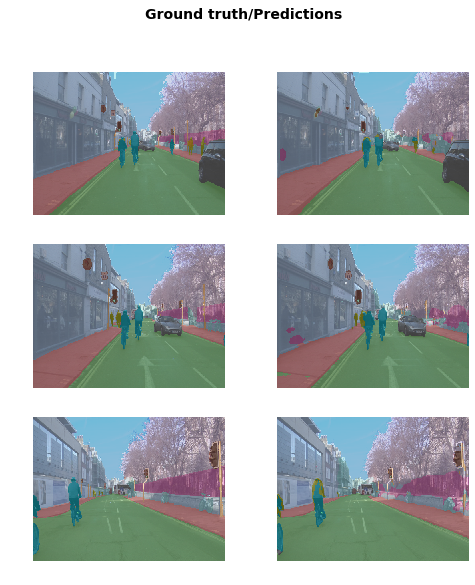

In [33]:
learn.show_results(rows=3, figsize=(8,9))

## Go big

In [124]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [134]:
size = src_size
bs=8

In [135]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

因为模型后期训练时，出现了训练损失降低，但验证损失却保持不变甚至反而增加的过拟合现象  
所以这里我将权重衰减wd设置为`1e-2*3`，默认值为`1e-2`，提升模型正则化效果

In [136]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=1e-2*3, model_dir='/tmp/models', bottle=True).load('stage-2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


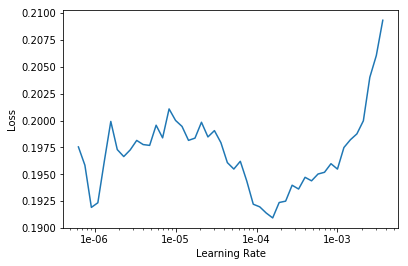

In [112]:
lr_find(learn)
learn.recorder.plot()

---
这里的lr=1e-3更多是尝试而来的，试过1e-5、1e-4，但模型都没有变得更好，而从学习率&损失曲线中也难以直接得到合适的学习率  
在尝试的过程中，记住训练的过程中，训练方式是fit_one_cycle，学习率会先增后减，loss也是先增后减  

**Jeremy提供的经验法则如下：**
- 因为fit_one_cycle策略，如果损失曲线(验证损失函数会表现得更明显)是一直下降(没有先上升后下降)的话，那么可以适当增大学习率，特别是在解冻模型之后
- 理想的损失函数曲线是先上后下，这样可以训练得更快，并且有更好的泛化效果。

In [53]:
lr=1e-03

In [54]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.192617,0.239355,0.931159,00:23
1,0.190179,0.246744,0.929601,00:23
2,0.187628,0.236957,0.929728,00:23
3,0.185952,0.263284,0.926297,00:23
4,0.185157,0.281245,0.922443,00:23
5,0.190102,0.244126,0.933076,00:23
6,0.191674,0.282018,0.919493,00:23
7,0.190827,0.319193,0.916979,00:23
8,0.187637,0.226138,0.936088,00:23
9,0.179105,0.209398,0.941331,00:23


可以看到已经得到了0.941+-的得分，在后面解冻模型后，也难以超越这个分数

In [55]:
learn.save('stage-1-big')

In [137]:
learn.load('stage-1-big');

In [138]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


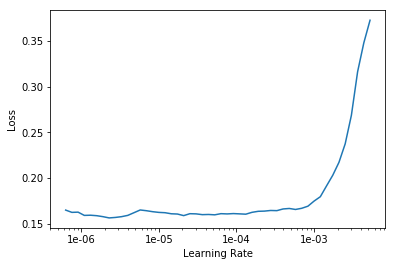

In [115]:
lr_find(learn)
learn.recorder.plot()

In [139]:
lrs = slice(lr/1000,lr/10)

In [142]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.158393,0.219848,0.938927,00:26
1,0.157399,0.226225,0.937523,00:26
2,0.158064,0.223652,0.937578,00:26
3,0.156603,0.213637,0.941245,00:26
4,0.154737,0.227888,0.937168,00:26
5,0.150998,0.225369,0.938753,00:26
6,0.149227,0.228248,0.938121,00:26
7,0.147841,0.223535,0.939776,00:26
8,0.145766,0.225737,0.939131,00:26
9,0.146070,0.224774,0.939390,00:26


In [143]:
learn.save('stage-2-big')

**模型前后对比**  
下面所示为模型第一次训练完成后的预测结果，里面会将马路上骑单车的行人的部分像素分类为人行道上行走的行人。

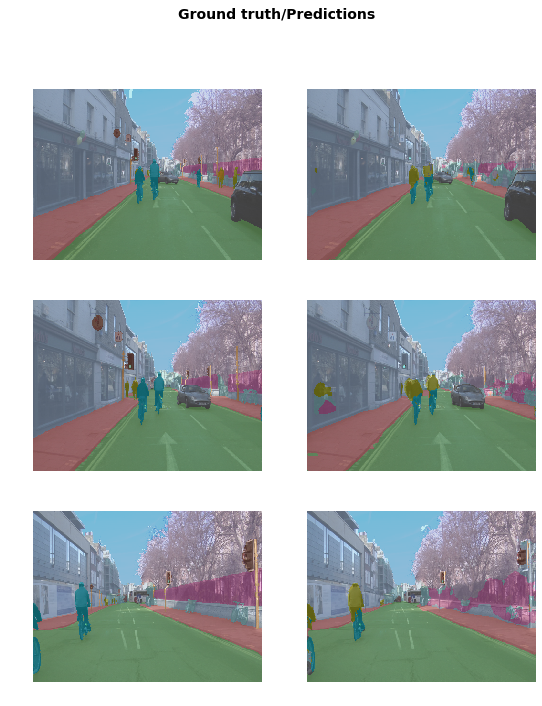

In [149]:
learn.load('stage-1');
learn.show_results(rows=3, figsize=(9,11))

而我们得分最高的模型却不会出现这样的现象。

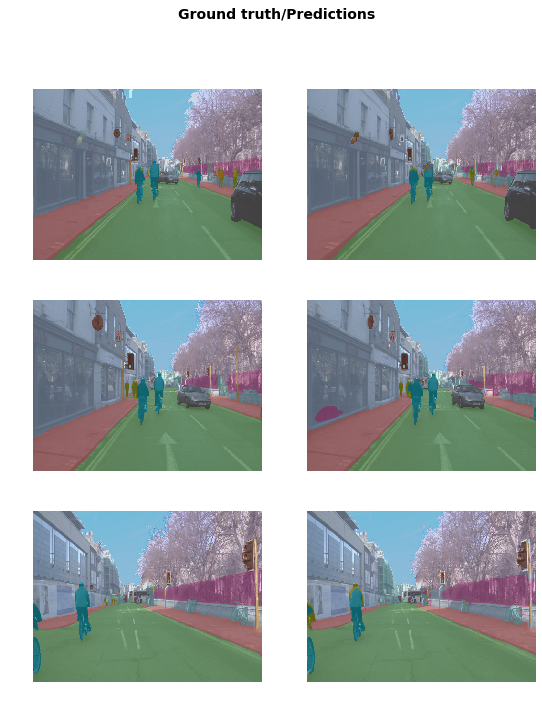

In [150]:
learn.load('stage-1-big');
learn.show_results(rows=3, figsize=(9,11))

## fin

In [ ]:
# start: 480x360

In [146]:
print(learn.summary())

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 180, 240]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 180, 240]       128        True      
______________________________________________________________________
ReLU                 [64, 180, 240]       0          False     
______________________________________________________________________
MaxPool2d            [64, 90, 120]        0          False     
______________________________________________________________________
Conv2d               [64, 90, 120]        36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 90, 120]        128        True      
______________________________________________________________________
ReLU                 [64, 90, 120]        0          False     
__________________________________________________